<a href="https://colab.research.google.com/github/AdityaPunetha/ML-Projects/blob/main/TensorFlow-Fashion-MNIST-Conditional-GAN/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [2]:
from numpy import expand_dims, ones, zeros
from numpy.random import randn, randint
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Dense,
    Reshape,
    Flatten,
    Conv2D,
    Conv2DTranspose,
    LeakyReLU,
    ReLU,
    Dropout,
    Embedding,
    Concatenate,
)

In [7]:
from tensorflow.keras.utils import plot_model

# Define Discriminator

In [3]:
in_shape=(28,28,1)
n_classes=10

In [4]:
def define_discriminator():
	in_label = Input(shape=(1,))
	li = Embedding(n_classes, 50)(in_label)
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	in_image = Input(shape=in_shape)

	merge = Concatenate()([in_image, li])

	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	fe = Flatten()(fe)
	fe = Dropout(0.4)(fe)

	out_layer = Dense(1, activation='sigmoid')(fe)

	model = Model([in_image, in_label], out_layer)

	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [5]:
discriminator = define_discriminator()

In [6]:
discriminator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        500         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1, 784)       39984       ['embedding[0][0]']              
                                                                                                  
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                              

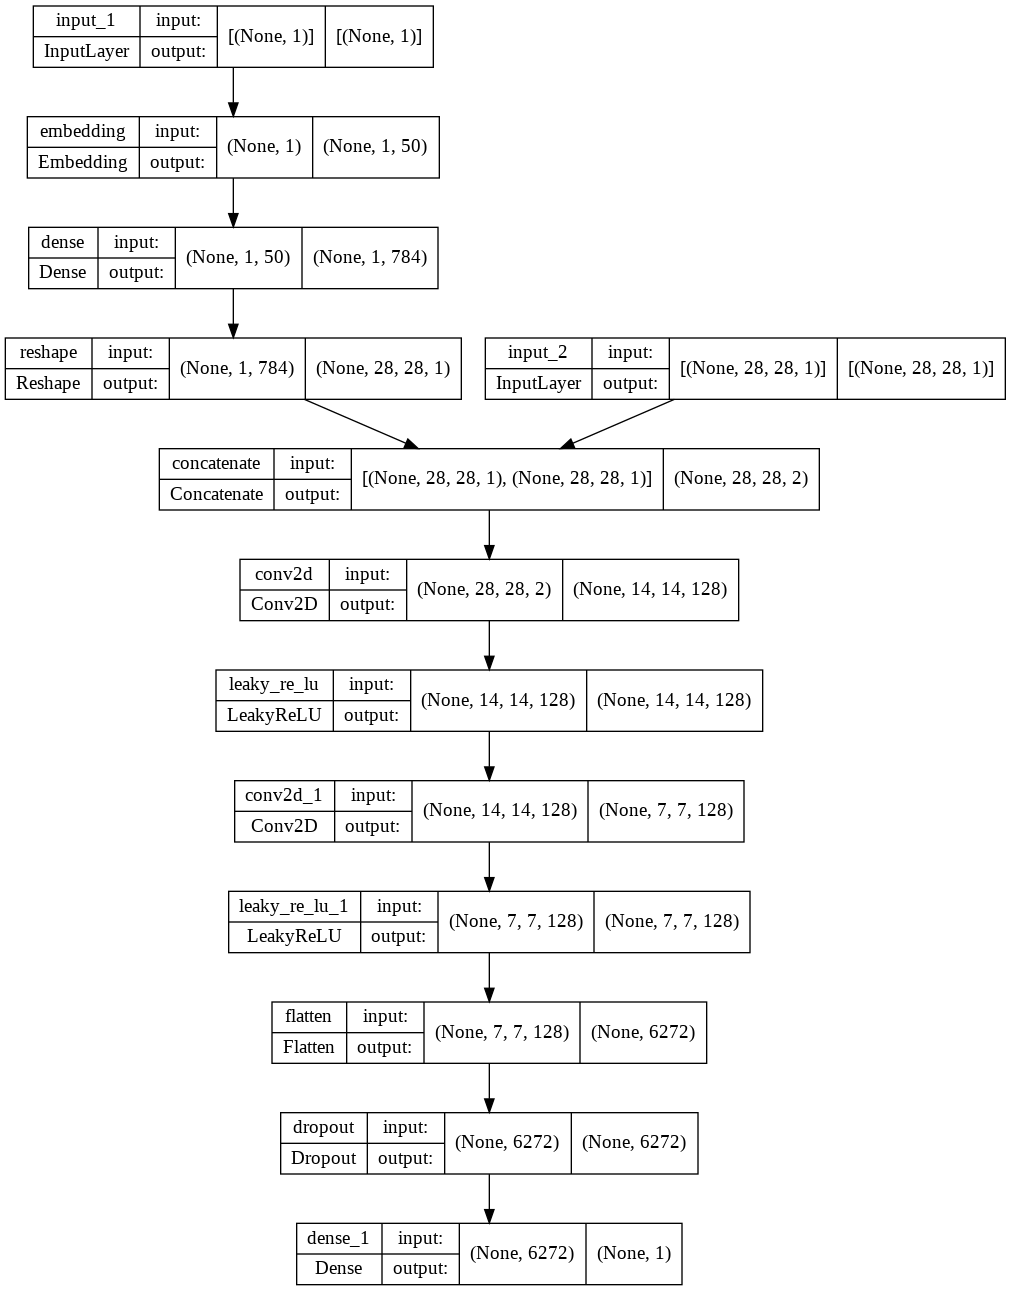

In [9]:
plot_model(discriminator, show_shapes=True)

# Define Generator